# Ejercicio de Feedback 1- Programación y Entornos de Trabajo para la IA

In [1]:
#librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Dado que los datos se encuentran en tres documentos diferentes cada uno para cada trimestre, he decido unirlos por si en algún momento me es útil.
#Es decir, voy a unir todo en un dataframe y añadiré en el mismo una columna llamada 'Trimestre' que tendrá valor 1, 2 o 3 segun el trimestre al que pertenezca esa fila de datos.
#Así evito repetir los codigos con tres dataframes diferentes:

# Cargo los tres trimestres en dfs
df1 = pd.read_csv("Hogwards - 20241T.csv")
df1["Trimestre"] = 1

df2 = pd.read_csv("Hogwards - 20242T.csv")
df2["Trimestre"] = 2

df3 = pd.read_csv("Hogwards - 20243T.csv")
df3["Trimestre"] = 3

# Unirlos todos en uno solo
df = pd.concat([df1, df2, df3], ignore_index=True)

df.head()

#Esta celda la hice antes de realizar los ejercicios obviamente, una vez terminados , no he utilizado el df en la primera parte ya que no lo veía útil y
#hasta el ejercicio último de representaciones gráficas ya que he visto que así sería mas sencillo

,ID,Name,Descriptive Name,Description,Domain,Owner,IsCompliance,Status,Version,NumberUsers,Trimestre
0,DP001,ProfeciaMonitor,Monitor de Pociones,"Data Product relacionado con adivinacion, util...",Adivinacion,Sybill Trelawney,True,Production,1.4.0,46,1
1,DP002,CriaturaWatch,Sistema de Seguimiento de Hechizos,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,True,Production,2.6.9,100,1
2,DP003,EstelarMap,Aplicacion de Transfiguraciones,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,False,Deprecated,0.4.1,38,1
3,DP004,Transfigurator,Monitor de Pociones,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,False,Development,2.9.6,99,1
4,DP005,CriaturaWatch,Vigilante de Criaturas Magicas,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,True,Production,2.3.7,51,1


In [ ]:
#Para conocer un poco mas mis datos
df.info()
#df.isna().sum()
df.isnull().sum()
#vemos informacion de las columnas y que no hay nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                207 non-null    object
 1   Name              207 non-null    object
 2   Descriptive Name  207 non-null    object
 3   Description       207 non-null    object
 4   Domain            207 non-null    object
 5   Owner             207 non-null    object
 6   IsCompliance      207 non-null    bool  
 7   Status            207 non-null    object
 8   Version           207 non-null    object
 9   NumberUsers       207 non-null    int64 
 10  Trimestre         207 non-null    int64 
dtypes: bool(1), int64(2), object(8)
memory usage: 16.5+ KB


,0
ID,0
Name,0
Descriptive Name,0
Description,0
Domain,0
Owner,0
IsCompliance,0
Status,0
Version,0
NumberUsers,0


## Ejercicio 1: Estado actual de los Data Products
- ¿Cuántos Data Products existen actualmente?
- Desglosa esta información por dominio y estado. Queremos saber qué áreas de Hogwarts están mejor (y peor) preparadas.


In [ ]:
# Número total de Data Products actualmente
#Al decir actualmente intuyo que debo de seleccionar al ultimo rimestre que es el último y más actualizado. DUDA
total_data_products_actuales = df3["ID"].nunique() # nunique que cuenta los distintos
print(f"Número total de Data Products en el trimestre actual: {total_data_products_actuales}")

# Tabla cruzada de dominio vs estado,  pivot_table para contar cuántos hay por dominio y estado.
resumen_actual = df3.pivot_table(
    index="Domain",
    columns="Status",
    values="ID",
    aggfunc="nunique",
    fill_value=0 #si no hay pono 0 ya que sino me pone Nan automaticamnete
)

resumen_actual

Número total de Data Products en el trimestre actual: 87


Status,Deprecated,Development,Planned,Production
Domain,,,,
Adivinacion,1,3,2,7
Astronomia,1,1,3,2
Cuidado de Criaturas Magicas,2,0,2,3
Defensa Contra las Artes Oscuras,1,2,6,1
Encantamientos,3,3,0,2
Herbologia,3,0,6,1
Historia de la Magia,3,5,3,1
Pociones,3,2,1,5
Transformaciones,4,2,1,2


## Ejercicio 2: Análisis trimestral de los Data Products en estado 'Planned' o 'Production'
- ¿Cuántos de estos cumplen con las normas de compliance?
- ¿Cuántos usuarios están utilizando estos Data Products en cada área?
- ¿Cuál es el promedio de usuarios por área?
- ¿Y en aquellos que no cumplen con compliance, cuántos usuarios tienen de todas formas?

In [ ]:
#Como aquí dice Análisis trimestral, voy a hacer una funcion con lo que hay que hacer en este aprtado y despues llamo a cada uno de los dataframes y asi evito repetir codigo
def analizar_trimestre(df_trimestre, nombre_trimestre):
    print(f"\n Análisis del trimestre {nombre_trimestre}:")

    # filtro por estado Planned o Production
    activos = df_trimestre[df_trimestre["Status"].isin(["Planned", "Production"])]

    # NUMERO con compliance TRUE
    cumplen = activos[activos["IsCompliance"] == True]["ID"].nunique()
    print(f"Data Products que cumplen con compliance:{cumplen}")

    # Número total de usuarios por área(DOMAIN)
    usuarios_area = activos.groupby("Domain")["NumberUsers"].sum()
    print(f"\n Número total de usuarios por área:{usuarios_area}")

    # Promedio de usuarios por área
    promedio_area = activos.groupby("Domain")["NumberUsers"].mean()
    print(f"\n Promedio de usuarios por área:{promedio_area}")

    # numero con compliance False
    sin_compliance = activos[activos["IsCompliance"] == False]["NumberUsers"].sum()
    print(f"\n Usuarios en productos sin compliance:{sin_compliance}")


In [ ]:
analizar_trimestre(df1, "Primer trimestre")



 Análisis del trimestre Primer trimestre:
Data Products que cumplen con compliance:14

 Número total de usuarios por área:Domain
Adivinacion                         259
Astronomia                          363
Cuidado de Criaturas Magicas        183
Defensa Contra las Artes Oscuras    177
Encantamientos                      200
Herbologia                          372
Historia de la Magia                 56
Pociones                            288
Transformaciones                     78
Name: NumberUsers, dtype: int64

 Promedio de usuarios por área:Domain
Adivinacion                          64.75
Astronomia                           90.75
Cuidado de Criaturas Magicas         61.00
Defensa Contra las Artes Oscuras     88.50
Encantamientos                      100.00
Herbologia                           93.00
Historia de la Magia                 56.00
Pociones                             72.00
Transformaciones                     39.00
Name: NumberUsers, dtype: float64

 Usuarios en prod

In [ ]:
analizar_trimestre(df2, "segundo trimestre")


 Análisis del trimestre segundo trimestre:
Data Products que cumplen con compliance:22

 Número total de usuarios por área:Domain
Adivinacion                         483
Astronomia                          463
Cuidado de Criaturas Magicas        262
Defensa Contra las Artes Oscuras    177
Encantamientos                      200
Herbologia                          468
Historia de la Magia                190
Pociones                            368
Transformaciones                    126
Name: NumberUsers, dtype: int64

 Promedio de usuarios por área:Domain
Adivinacion                          69.000000
Astronomia                           92.600000
Cuidado de Criaturas Magicas         52.400000
Defensa Contra las Artes Oscuras     88.500000
Encantamientos                      100.000000
Herbologia                           78.000000
Historia de la Magia                 63.333333
Pociones                             61.333333
Transformaciones                     42.000000
Name: NumberUse

In [ ]:
analizar_trimestre(df3, "Tercer trimestre")


 Análisis del trimestre Tercer trimestre:
Data Products que cumplen con compliance:28

 Número total de usuarios por área:Domain
Adivinacion                         639
Astronomia                          463
Cuidado de Criaturas Magicas        262
Defensa Contra las Artes Oscuras    598
Encantamientos                      200
Herbologia                          566
Historia de la Magia                269
Pociones                            368
Transformaciones                    126
Name: NumberUsers, dtype: int64

 Promedio de usuarios por área:Domain
Adivinacion                          71.000000
Astronomia                           92.600000
Cuidado de Criaturas Magicas         52.400000
Defensa Contra las Artes Oscuras     85.428571
Encantamientos                      100.000000
Herbologia                           80.857143
Historia de la Magia                 67.250000
Pociones                             61.333333
Transformaciones                     42.000000
Name: NumberUser

## Ejercicio 3: Análisis trimestral de los Data Products 'Deprecated'
- ¿Cuántos Data Products en estado 'Deprecated' hay en cada dominio?
- ¿Cuántos usuarios siguen conectados a estos Data Products?

In [ ]:
#seguimos haciendo el código en una funcion al pedir un analisis trimestral

def analizar_deprecated(df_trimestre, nombre_trimestre):
    print(f"\n Análisis de productos 'Deprecated' - Trimestre {nombre_trimestre}:")

    # Filto solo productos en estado Deprecated
    deprecated = df_trimestre[df_trimestre["Status"] == "Deprecated"]

    # n productos Deprecated por dominio
    productos_por_dominio = deprecated.groupby("Domain")["ID"].nunique()
    print(f"\nNúmero de productos 'Deprecated' por dominio:{productos_por_dominio}")
    # n usuarios conectados a productos Deprecated
    total_usuarios = deprecated["NumberUsers"].sum()
    print(f"\n Total de usuarios en productos 'Deprecated': {total_usuarios}")


In [ ]:
analizar_deprecated(df1, "1T")


 Análisis de productos 'Deprecated' - Trimestre 1T:

Número de productos 'Deprecated' por dominio:Domain
Adivinacion             1
Encantamientos          2
Herbologia              3
Historia de la Magia    2
Pociones                2
Transformaciones        2
Name: ID, dtype: int64

 Total de usuarios en productos 'Deprecated': 668


In [ ]:
analizar_deprecated(df2, "2T")


 Análisis de productos 'Deprecated' - Trimestre 2T:

Número de productos 'Deprecated' por dominio:Domain
Adivinacion                         1
Cuidado de Criaturas Magicas        1
Defensa Contra las Artes Oscuras    1
Encantamientos                      3
Herbologia                          3
Historia de la Magia                2
Pociones                            2
Transformaciones                    4
Name: ID, dtype: int64

 Total de usuarios en productos 'Deprecated': 959


In [ ]:
analizar_deprecated(df3, "3T")


 Análisis de productos 'Deprecated' - Trimestre 3T:

Número de productos 'Deprecated' por dominio:Domain
Adivinacion                         1
Astronomia                          1
Cuidado de Criaturas Magicas        2
Defensa Contra las Artes Oscuras    1
Encantamientos                      3
Herbologia                          3
Historia de la Magia                3
Pociones                            3
Transformaciones                    4
Name: ID, dtype: int64

 Total de usuarios en productos 'Deprecated': 1171


## Ejercicio 4: Análisis de los funcionarios (Owners) por cada trimestre
- ¿Cuántos funcionarios están trabajando, y cuántos Data Products (por estado) tienen asignados?
- ¿En cada dominio, quiénes son los tres Owners con más usuarios en sus Data Products en estado 'Planned' o 'Production'?
- ¿Quién es el Owner menos productivo en cada dominio? (Mayor porcentaje de Data Products 'Deprecated')
- ¿Hay algún funcionario que esté trabajando en varios dominios a la vez?

In [ ]:
#defino otra vez una funcion para depsues ejecutarla con cada uno de los trimestres
def analizar_owners(df_trimestre, nombre_trimestre):
    print(f"\n Análisis de Owners para el trimestre: {nombre_trimestre}:")

    # cantidad de Owners únicos y productos asignados por estado
    owners_estado = df_trimestre.groupby(["Owner", "Status"])["ID"].nunique().unstack(fill_value=0)
    print("\n- Productos por estado y Owner:")
    print(owners_estado)
#con unstack(fill_value=0) al igual que en un ejercicio anterior busco la forma para rellenar los estados vacios en un owner concreto,
#asi aparecen todos los estados incluso si para ese owner no hay

    total_owners = df_trimestre["Owner"].nunique()
    print(f"\nTotal de Owners únicos: {total_owners}")

    # Top 3 Owners con más usuarios (Planned o Production), por dominio
    activos = df_trimestre[df_trimestre["Status"].isin(["Planned", "Production"])]
    top_owners = (
        activos.groupby(["Domain", "Owner"])["NumberUsers"]
        .sum()
        .reset_index() #tengo que resetear el indice ya que sino me da error
        .sort_values(["Domain", "NumberUsers"], ascending=[True, False])
    )
    print("\n Top 3 Owners por dominio (usuarios en Planned o Production):")
    for dominio in top_owners["Domain"].unique(): #este bucle recorre cada uno de los dominios ya que así lo pide el enunciado
        top = top_owners[top_owners["Domain"] == dominio].head(3)
        print(f"\nDominio: {dominio}")
        print(top[["Owner", "NumberUsers"]])

    # owner menos productivo en cada dominio que es lo mismo quie el más % de productos deprecated
    resumen = df_trimestre.groupby(["Domain", "Owner", "Status"])["ID"].count().unstack(fill_value=0)
    resumen["Total"] = resumen.sum(axis=1) #al poner axis  =1 suma horizontalmente, es decir de izq a der
    resumen["%Deprecated"] = resumen["Deprecated"] / resumen["Total"] #calculo el %
    maximos = resumen.groupby("Domain")["%Deprecated"].transform("max") == resumen["%Deprecated"] #uso transform y no .agg ya que matiene el mismo n de filas puedo hacer comparaciones fila a fila que es lo que quiero
    menos_productivos = resumen[maximos]
    print("\n Owner menos productivo por dominio:")
    print(menos_productivos[["%Deprecated"]])

    # owners en varios dominios
    dominios_por_owner = df_trimestre.groupby("Owner")["Domain"].nunique()
    owners_varios_dominios = dominios_por_owner[dominios_por_owner > 1]
    print(f"\n numero de owners trabajando en varios dominios: {owners_varios_dominios.count()}")
    print(f"\nEs el owner: {owners_varios_dominios}")


In [ ]:
analizar_owners(df1, "1T")



 Análisis de Owners para el trimestre: 1T:

- Productos por estado y Owner:
Status                    Deprecated  Development  Planned  Production
Owner                                                                 
Alastor Moody                      0            0        0           1
Aurora Sinistra                    0            0        3           1
Cuthbert Binns                     2            3        0           1
Filius Flitwick                    2            1        0           2
Firenze                            0            1        0           2
Horace Slughorn                    0            1        1           1
Minerva McGonagall                 2            2        1           1
Pomona Sprout                      3            0        4           0
Rubeus Hagrid                      0            0        1           1
Severus Snape                      2            2        1           2
Sybill Trelawney                   1            2        0           2


In [ ]:

analizar_owners(df2, "2T")


 Análisis de Owners para el trimestre: 2T:

- Productos por estado y Owner:
Status                    Deprecated  Development  Planned  Production
Owner                                                                 
Alastor Moody                      1            0        0           1
Aurora Sinistra                    0            1        3           2
Cuthbert Binns                     2            4        2           1
Filius Flitwick                    3            1        0           2
Firenze                            0            1        0           3
Horace Slughorn                    0            1        1           2
Minerva McGonagall                 4            2        1           2
Pomona Sprout                      3            0        5           1
Rubeus Hagrid                      0            0        2           2
Severus Snape                      2            2        1           3
Sybill Trelawney                   1            2        1           3


In [ ]:
analizar_owners(df3, "3T")


 Análisis de Owners para el trimestre: 3T:

- Productos por estado y Owner:
Status                    Deprecated  Development  Planned  Production
Owner                                                                 
Alastor Moody                      1            0        1           1
Aurora Sinistra                    1            1        3           2
Cuthbert Binns                     3            5        3           1
Filius Flitwick                    3            3        0           2
Firenze                            0            1        1           4
Horace Slughorn                    0            1        1           2
Minerva McGonagall                 4            2        1           2
Pomona Sprout                      3            0        6           1
Remus Lupin                        0            1        1           0
Rubeus Hagrid                      0            0        2           2
Severus Snape                      3            2        4           3


# Informe de Resultados y análisis de Data Products en Hogwarts

A continuación, se presentan los resultados obtenidos tras el análisis de los Data Products registrados en la Escuela de Magia y Hechicería de Hogwarts durante los tres trimestres del año.



## 1. Estado actual de los Data Products

- **¿Cuántos Data Products existen actualmente?**
- **Desglose por dominio y estado.**
- **¿Qué áreas de Hogwarts están mejor (y peor) preparadas?**

En el trimestre más reciente (T3), se registran un total de 87 Data Products únicos en Hogwarts.

El dominio con más productos en estado Production es Adivinacion, con 7 productos activos y le sigue Pociones, con 5 productos en producción.

Historia de la Magia, Defensa Contra las Artes Oscuras y Herbologia tienen solo 1 producto en estado Production. Sin embargo, Historia de la Magia destaca en desarrollo con 5 productos, y tanto Defensa Contra las Artes Oscuras como Herbologia destacan en planificación, con 6 productos cada una.

Encantamientos tiene 3 productos en desarrollo y 2 en producción, aunque no cuenta con productos en planificación. Astronomia presenta un reparto equilibrado entre los distintos estados.

Cuidado de Criaturas Magicas no tiene productos en desarrollo, pero mantiene un reparto balanceado con 2 en estado Deprecated, 2 en planificación y 3 en producción.

Transformaciones es el dominio con más productos en estado Deprecated, con un total de 4, y solo cuenta con 2 productos en producción.

En conjunto, Adivinacion y Pociones están más avanzados en producción, mientras que otros dominios presentan mayor actividad en fases previas como planificación o desarrollo.


## 2. Análisis trimestral de los Data Products en estado "Planned" o "Production"

- **¿Cuántos de estos cumplen con las normas de compliance?**
- **¿Cuántos usuarios están utilizando estos Data Products en cada área?**
- **¿Cuál es el promedio de usuarios por área?**
- **¿Y en aquellos que no cumplen con compliance, cuántos usuarios tienen de todas formas?**

Primer trimestre:

En el primer trimestre hay 14 Data Products en estado Planned o Production que cumplen con las normas de compliance.

El área con mayor número de usuarios es Herbologia (372), seguida de Astronomia (363) y Pociones (288). Por el contrario, Transformaciones (78) e Historia de la Magia (56) tienen los valores más bajos.

En cuanto al promedio de usuarios por área, los valores más altos se encuentran en Encantamientos (100), Herbologia (93) y Defensa Contra las Artes Oscuras (88.5). Transformaciones de nuevo presenta el promedio más bajo, con 39.

Hay 819 usuarios accediendo a Data Products que no cumplen con compliance, lo que indica que habría que tenerlo en cuenta.

Segundo trimestre:

Se observa un aumento en el número de Data Products que cumplen con compliance, pasando de 14 en el primer trimestre a 22 en este periodo.

Herbología y Astronomia se mantienen entre las áreas con mayor número de usuarios, con 468 y 463 respectivamente. Adivinación (483)  sube notablemente, mientras que Historia de la Magia (190) y Transformaciones (126) siguen teniendo un menor volumen de usuarios, aunque algo superior al trimestre anterior.

En cuanto al promedio, Encantamientos vuelve a ser el único con un promedio de 100 usuarios por producto. Astronomia también se mantiene con valores altos mientras que herbología cae unos 15 puntos y los valores más bajos se registran nuevamente en Transformaciones (42).

El número de usuarios accediendo a productos que no cumplen con compliance ha aumentado a 1072, lo que refleja una tendencia preocupante.

Tercer trimestre:

En el tercer trimestre continúa la tendencia ascendente alcanzando los 28 Data Products.

Adivinacion, Herbologia y Astronomia se consolidan como las áreas con mayor número de usuarios, superando ampliamente los 450. Destaca especialmente Defensa Contra las Artes Oscuras, que pasa de 177 usuarios en los dos primeros trimestres a 598 en este último. Por su parte, Historia de la Magia (269) y Transformaciones (126) se mantienen en los niveles más bajos.

En cuanto al promedio de usuarios, los valores siguen practicamente la misma tendencia que en los dos trimestres anteriores.

El número de usuarios en productos que no cumplen con compliance continúa aumentando, alcanzando los 1326. Esta evolución confirma la necesidad de tomar medidas para evitarlo.


## 3. Análisis trimestral de los Data Products "Deprecated"

- **¿Cuántos Data Products en estado "Deprecated" hay en cada dominio?**
- **¿Cuántos usuarios siguen conectados a estos Data Products que, oficialmente, ya no están en servicio?**

Primer trimestre:

En el primer trimestre se registran productos en estado Deprecated en seis dominios. Herbologia presenta el número más alto, con 3 productos en este estado. Le siguen Encantamientos, Historia de la Magia, Pociones y Transformaciones, cada uno con 2 productos. Adivinacion el que menos, tiene 1.

En total, 668 usuarios siguen conectados a productos que no están en servicio.

Segundo trimestre:

Se observa una ligera ampliación en el número de dominios con productos en estado Deprecated. Transformaciones es ahora el dominio con mayor número de productos obsoletos, con 4, seguido de Encantamientos y Herbologia con 3 cada uno. Además, se suman nuevos casos en Cuidado de Criaturas Mágicas y Defensa Contra las Artes Oscuras, ambos con 1 producto.

El número de usuarios conectados a estos productos aumenta respecto al trimestre anterior, pasando de 668 a 959.

Tercer trimestre:

Se mantiene la tendencia observada en el anterior. Transformaciones sigue siendo el dominio con más productos. Encantamientos, Herbologia, Historia de la Magia y Pociones presentan cada uno 3 productos obsoletos. También se incorpora Astronomia con 1 producto en esta situación y el resto se mantiene.

El número de usuarios conectados a estos productos ha seguido aumentando, alcanzando los 1171, frente a los 959 del segundo trimestre y los 668 del primero. Esto confirma que el uso de productos en estado obsoleto va en aumento.


## 4. Análisis de los funcionarios (Owners) por cada trimestre

- **¿Cuántos funcionarios están trabajando, y cuántos Data Products (por estado) tienen asignados?**
- **En cada dominio, ¿quiénes son los tres Owners con más usuarios en sus Data Products en estado "Planned" o "Production"?**
- **¿Quién es el Owner menos productivo en cada dominio?**
- **¿Hay algún funcionario que esté trabajando en varios dominios a la vez?**

Primer trimestre:

En el primer trimestre participaron 12 owners diferentes. Los productos están repartidos en distintos estados, destacando Pomona Sprout con 7 productos (3 deprecated y 4 planned), y Cuthbert Binns con 6 productos (principalmente en desarrollo).

En cuanto a los owners con más usuarios en productos en estado Planned o Production, destacan Aurora Sinistra en Astronomia con 363, y Pomona Sprout en Herbologia con 372.

Respecto a los menos productivos, se considera aquellos con mayor porcentaje de productos en estado deprecated. En este sentido, destacan Pomona Sprout (42,8 %), Filius Flitwick (40 %) y Severus Snape (también 40 % en Pociones).

Finalmente, el único owner que participa en más de un dominio es Severus Snape, quien trabaja en Defensa Contra las Artes Oscuras y Pociones.

Segundo trimestre:

Se mantiene el mismo número de owners activos. Algunos perfiles siguen siendo constantes en cuanto a volumen de productos asignados. Otros como por ejemplo Cuthbert Binns, amplía su actividad hasta 9 productos, siendo uno de los más implicados. Por otra parte, Pomona Sprout y Minerva McGonagall también gestionan un número elevado de productos en distintos estados.

Entre los owners con más usuarios en productos activos, se repiten los nombres del trimestre anterior: Pomona Sprout en Herbologia y Aurora Sinistra en Astronomia aunque también suben los usuarios en algunos otros.

Los mayores porcentajes de productos obsoletos se dan en Wilhelmina Grubbly-Plank, Alastor Moody y Filius Flitwick, todos con un 50 % y le sigue Minerva McGonagall con un 44,4 % en Transformaciones.

Severus Snape continúa siendo el único owner que participa en más de un dominio, manteniendo su implicación en Pociones y Defensa Contra las Artes Oscuras.

Tercer trimestre:

Aumenta el número total de owners, pasando a 13. Se mantiene la tendencia de participación constante de varios perfiles, especialmente Cuthbert Binns, Pomona Sprout y Severus Snape, que acumulan un alto número de productos en distintos estados.

Entre los owners más destacados por volumen de usuarios, suma posiciones Firenze (372 en Adivinacion) y se mantienen Aurora Sinistra (463 en Astronomia) y Pomona Sprout (566 en Herbologia).

En cuanto a los owners menos productivos, se observa un porcentaje elevado de  Wilhelmina Grubbly-Plank (66,7 %), seguida de Severus Snape (42,8 %) y Minerva McGonagall (44,4 %).

Severus Snape sigue siendo el único owner que participa en más de un dominio.



## Visualizaciones
- Gráfica de Data Products actuales por dominio y su estado.
- Evolución temporal del número de usuarios de Data Products en producción.
- Evolución temporal de Data Products totales frente a aquellos que cumplen con compliance.
- Evolución temporal del número de Owners por dominio.

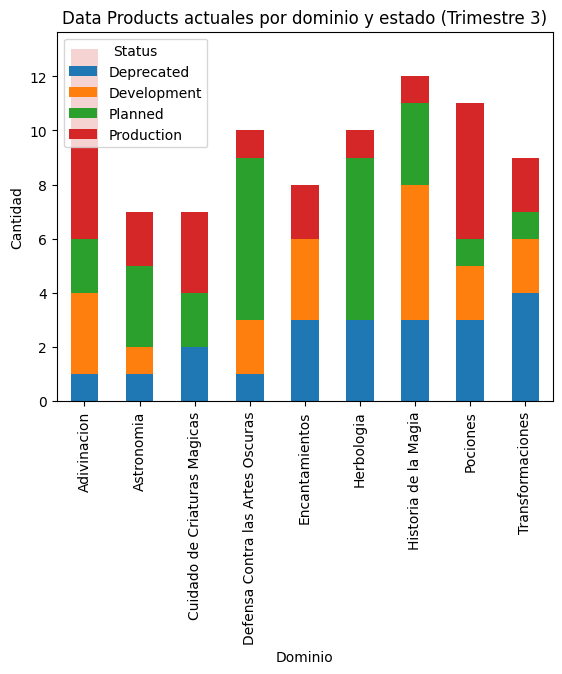

In [ ]:
# Gráfica de Data Products actuales por dominio y estado (trimestre 3)
estado_dominio = df3.pivot_table(index="Domain", columns="Status", values="ID", aggfunc="nunique", fill_value=0)
estado_dominio.plot(kind="bar", stacked=True)
plt.title("Data Products actuales por dominio y estado (Trimestre 3)")
plt.xlabel("Dominio")
plt.ylabel("Cantidad")
plt.show()

La gráfica anterior muestra la distribución de los Data Products en el tercer trimestre según su estado (Deprecated, Development, Planned, Production) para cada dominio.

Se observa que Adivinacion y Pociones destacan por tener una mayor cantidad de productos en producción. Por otro lado, Transformaciones presentan un alto número de productos deprecated, lo cual puede estar relacionado con los altos porcentajes detectados previamente.

Herbologia y Defensa Contra las Artes Oscuras concentran la mayor parte de sus productos en fase de planificación. En cambio, dominios como Encantamientos y Astronomia muestran un reparto más equilibrado entre los distintos estados

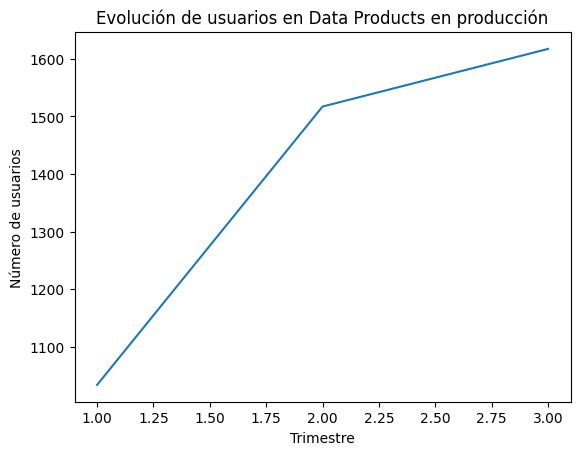

In [ ]:
# Evolución de usuarios en Data Products en producción
produccion = df[df["Status"] == "Production"]
usuarios_por_trimestre = produccion.groupby("Trimestre")["NumberUsers"].sum()
usuarios_por_trimestre.plot()
plt.title("Evolución de usuarios en Data Products en producción")
plt.xlabel("Trimestre")
plt.ylabel("Número de usuarios")
plt.show()

La gráfica refleja el número total de usuarios conectados a Data Products en estado Production a lo largo de los tres trimestres.

Se observa una evolución creciente. En el primer trimestre había algo más de 1000 usuarios, que aumentan a más de 1500 en el segundo y superan los 1600 en el tercero.

Este crecimiento puede deberse a la reducción de productos en fase de desarrollo y planificación en algunos dominios y que han pasado a un estado productivo durante el año.


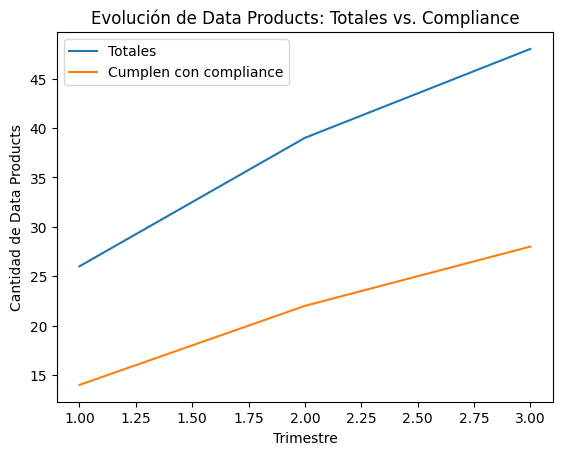

In [ ]:
#Evolución temporal de Data Products totales frente a aquellos que cumplen con compliance
totales = df[df["Status"].isin(["Planned", "Production"])].groupby("Trimestre")["ID"].nunique()
cumplen = df[(df["Status"].isin(["Planned", "Production"])) & (df["IsCompliance"] == True)].groupby("Trimestre")["ID"].nunique()

plt.plot(totales.index, totales.values, label="Totales")
plt.plot(cumplen.index, cumplen.values,  label="Cumplen con compliance")
plt.title("Evolución de Data Products: Totales vs. Compliance")
plt.xlabel("Trimestre")
plt.ylabel("Cantidad de Data Products")
plt.legend()
plt.show()



Esta gráfica muestra el número de Data Products activos (en estado Planned o Production) a lo largo de los tres trimestres, comparando los totales con aquellos que cumplen con las normas de compliance.

Ambas curvas presentan una evolución ascendente. El número total de productos crece trimestre a trimestre. Paralelamente, también aumenta el número de productos que cumplen con compliance, aunque siempre por debajo de los totales.

La distancia entre ambas líneas sugiere que una parte de los productos sigue sin cumplir con compliance.


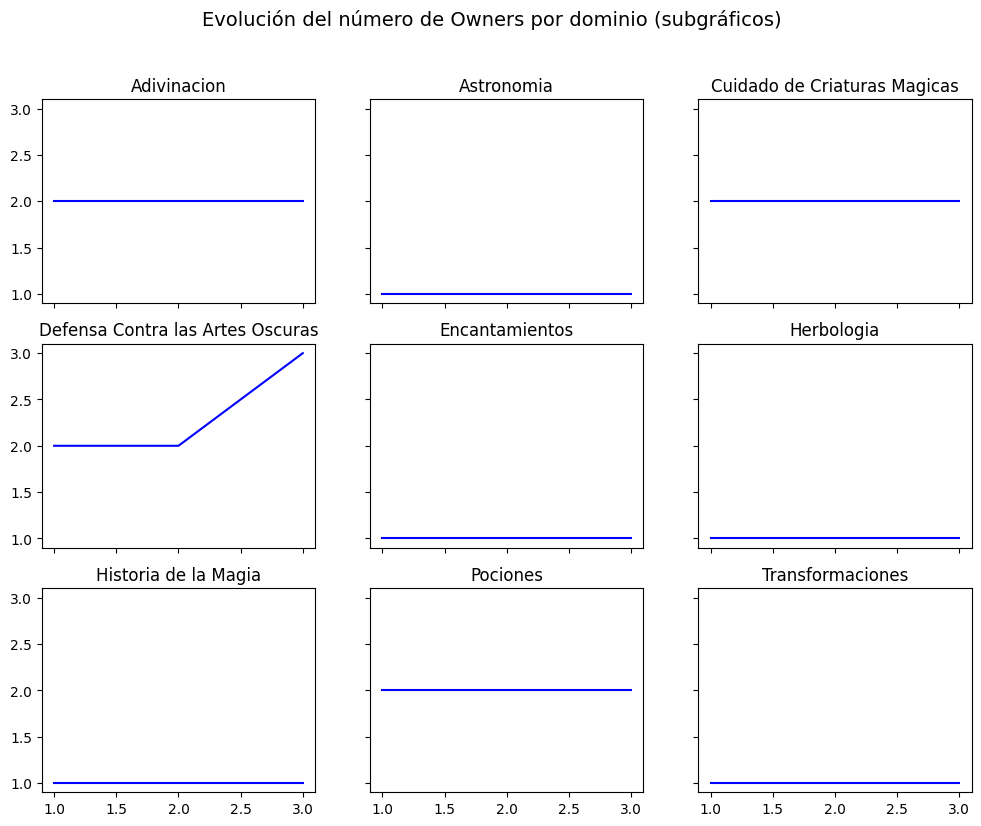

In [ ]:
#Evolución temporal del número de Owners por dominio
#aqui he tenido que hacer un grafico para cada dominio y ves su variacion para cada trimestre ya que en uno solo todo junto se solapaban y no se representaba correctamente
owners_dominio = df.groupby(["Trimestre", "Domain"])["Owner"].nunique().unstack(fill_value=0)

#  3 filas x 3 columnas
fig, axs = plt.subplots(3, 3, figsize=(12, 9), sharex=True, sharey=True)
axs = axs.flatten()

# bucle para hacerlo para cada dominio
for i, dominio in enumerate(owners_dominio.columns):
    axs[i].plot(owners_dominio.index, owners_dominio[dominio], color="blue")
    axs[i].set_title(dominio)

fig.suptitle("Evolución del número de Owners por dominio (subgráficos)", fontsize=14)
plt.show()


La visualización muestra la evolución del número de owners distintos por dominio a lo largo de los tres trimestres. Para evitar solapamientos, se representa cada dominio en un subgráfico independiente.

En la mayoría de los dominios, el número de owners se mantiene constante. Sin embargo, en Defensa Contra las Artes Oscuras se observa un incremento en el tercer trimestre, pasando de 2 a 3 owners.

Dominios como Adivinacion, Pociones o Cuidado de Criaturas Mágicas mantienen una participación constante de 2 owners, mientras que otros como Astronomia, Herbologia o Transformaciones se mantienen estables con un único responsable a lo largo de los trimestres.
